### 1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

7. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268




In [121]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# from sklearn import bina
import numpy as np
from keras.losses import binary_crossentropy
from mlxtend.plotting import plot_decision_regions
# Your code here

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_recall_curve,precision_score

ModuleNotFoundError: No module named 'mlxtend'

In [95]:
df=pd.read_csv('pima_diabates.txt',usecols=['Plasma glucose concentration','target'])

In [96]:
df

,Plasma glucose concentration,target
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
...,...,...
763,101,0
764,122,0
765,121,0
766,126,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Plasma glucose concentration  768 non-null    int64
 1   target                        768 non-null    int64
dtypes: int64(2)
memory usage: 12.1 KB


In [98]:
df.describe()

,Plasma glucose concentration,target
count,768.000000,768.000000
mean,120.894531,0.348958
std,31.972618,0.476951
min,0.000000,0.000000
25%,99.000000,0.000000
50%,117.000000,0.000000
75%,140.250000,1.000000
max,199.000000,1.000000


#### Data Preprocessing and Filter

In [99]:
df.isnull().sum()

Plasma glucose concentration    0
target                          0
dtype: int64

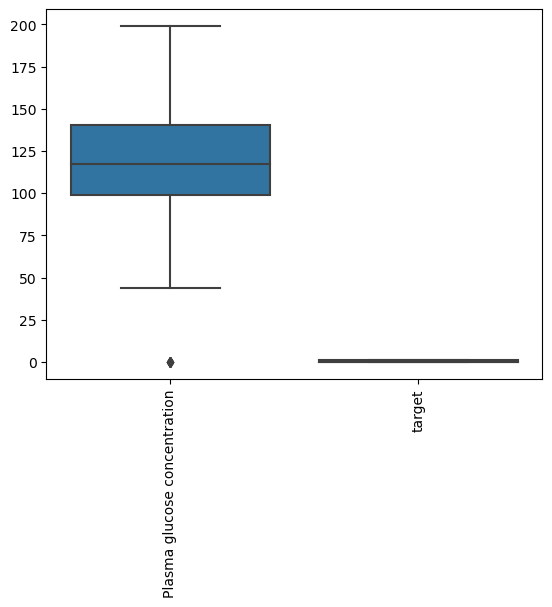

In [100]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [101]:
df1=df.loc[~(df['Plasma glucose concentration']==0)]

### After Removing 5 data points

In [104]:
X=df1.drop('target',axis=1)
y=df1.target

## Only one feature

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [109]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [112]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7777777777777778


In [113]:
confusion_matrix(y_test,y_pred)

array([[91, 11],
       [23, 28]])

In [114]:
f1_score(y_test,y_pred)

0.6222222222222223

Text(50.722222222222214, 0.5, 'predicted')

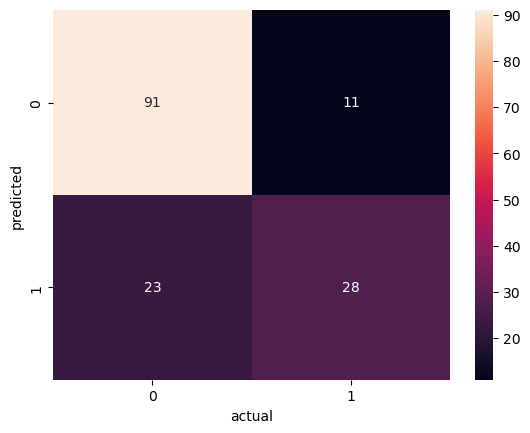

In [115]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('actual')
plt.ylabel('predicted')

In [116]:
recall_score(y_test,y_pred)

0.5490196078431373

In [117]:
precision_score(y_test,y_pred)

0.717948717948718

In [118]:
# Print the coefficients (parameter values) and intercept term
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[0.0391938]]
Intercept: [-5.5126954]


## straight line

In [120]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline  
 
gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(14,10))
 
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'Neural Network']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]):
 
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

In [69]:
y_hat=model.intercept_[0] + model.coef_[0]*X_test

In [70]:
import numpy as np


In [71]:
x=np.arange(0,10,0.1)

In [72]:
m=2 
c=1
y=m*x+c

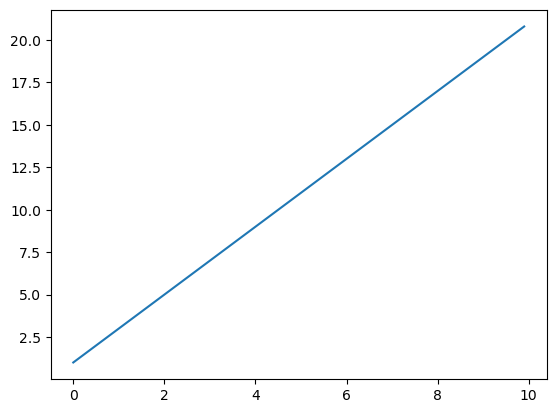

In [73]:
plt.plot(x,y)

In [74]:
X_train[:]

338    152
726    116
207    162
741    102
282    133
      ... 
645    157
572    111
758    106
549    189
577    118
Name: Plasma glucose concentration, Length: 610, dtype: int64

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# # 1. Train your logistic regression model using your classification dataset
# X_train = ...  # Your training features
# y_train = ...  # Your training labels
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

# 2. Determine the minimum and maximum values for the features in your dataset
min_x1, max_x1 = np.min(X_train[:]), np.max(X_train[:])
min_x2, max_x2 = np.min(X_train[:]), np.max(X_train[:])

# 3. Create a meshgrid of points based on the minimum and maximum feature values
x1_vals = np.linspace(min_x1, max_x1, 100)
# x2_vals = np.linspace(min_x2, max_x2, 100)
X1 = np.meshgrid(x1_vals)
meshgrid_points = np.c_[X1]




In [79]:
meshgrid_points.ravel()

array([ 44.        ,  45.55555556,  47.11111111,  48.66666667,
        50.22222222,  51.77777778,  53.33333333,  54.88888889,
        56.44444444,  58.        ,  59.55555556,  61.11111111,
        62.66666667,  64.22222222,  65.77777778,  67.33333333,
        68.88888889,  70.44444444,  72.        ,  73.55555556,
        75.11111111,  76.66666667,  78.22222222,  79.77777778,
        81.33333333,  82.88888889,  84.44444444,  86.        ,
        87.55555556,  89.11111111,  90.66666667,  92.22222222,
        93.77777778,  95.33333333,  96.88888889,  98.44444444,
       100.        , 101.55555556, 103.11111111, 104.66666667,
       106.22222222, 107.77777778, 109.33333333, 110.88888889,
       112.44444444, 114.        , 115.55555556, 117.11111111,
       118.66666667, 120.22222222, 121.77777778, 123.33333333,
       124.88888889, 126.44444444, 128.        , 129.55555556,
       131.11111111, 132.66666667, 134.22222222, 135.77777778,
       137.33333333, 138.88888889, 140.44444444, 142.  

In [89]:
probs

array([0.01478237, 0.01581076, 0.01690946, 0.01808311, 0.01933661,
       0.02067518, 0.02210432, 0.02362986, 0.02525797, 0.02699516,
       0.02884829, 0.0308246 , 0.03293172, 0.03517764, 0.03757078,
       0.04011996, 0.0428344 , 0.04572375, 0.04879806, 0.0520678 ,
       0.05554383, 0.05923743, 0.06316021, 0.06732418, 0.07174164,
       0.07642521, 0.08138772, 0.08664224, 0.09220195, 0.09808011,
       0.10428996, 0.11084467, 0.11775718, 0.12504015, 0.1327058 ,
       0.14076579, 0.14923108, 0.15811177, 0.16741695, 0.17715453,
       0.18733104, 0.1979515 , 0.20901922, 0.22053558, 0.23249996,
       0.24490948, 0.25775891, 0.2710405 , 0.28474391, 0.29885611,
       0.3133613 , 0.32824093, 0.34347367, 0.35903549, 0.37489976,
       0.39103736, 0.40741686, 0.42400474, 0.44076565, 0.45766268,
       0.47465767, 0.49171157, 0.50878479, 0.52583753, 0.54283023,
       0.55972383, 0.57648022, 0.59306254, 0.60943546, 0.62556555,
       0.64142142, 0.65697404, 0.67219684, 0.68706586, 0.70155

TypeError: Input z must be 2D, not 1D

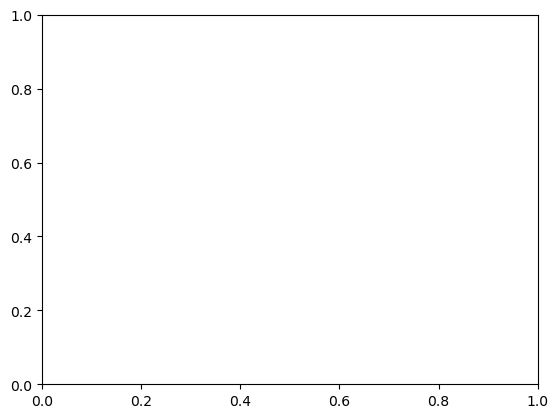

In [88]:
# 4. Predict the class probabilities for the meshgrid points using your trained logistic regression model
probs = model.predict_proba(meshgrid_points.ravel().reshape(-1,1))[:, 1]
probs = probs

# 5. Plot the decision boundary using a contour plot or a filled contour plot
plt.contourf(X1[0], probs, cmap='RdBu', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.colorbar()
plt.show()

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 100)

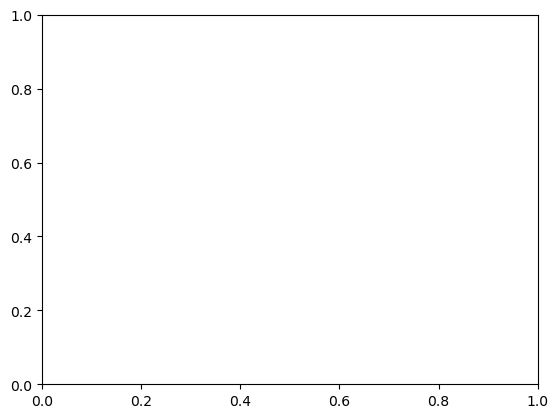

In [93]:
plt.contourf(X1, X1, cmap='RdBu', alpha=0.8)

In [37]:
X_test.reset_index(drop=True).index

RangeIndex(start=0, stop=149, step=1)

In [38]:
X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())

In [39]:
X_test

609    0.482051
539    0.564103
694    0.887179
350    0.748718
174    0.666667
         ...   
404    0.425641
69     0.512821
712    0.538462
131    0.641026
44     0.923077
Name: Plasma glucose concentration, Length: 149, dtype: float64

Text(0.5, 1.0, 'Decision boundary')

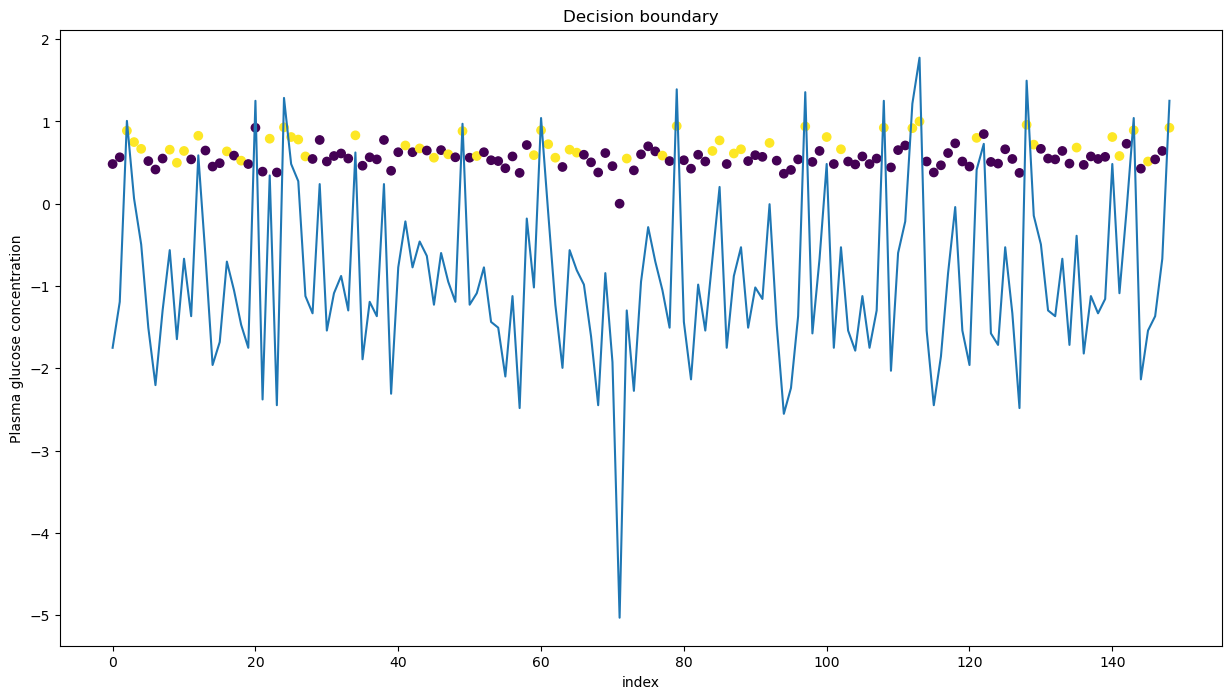

In [82]:
plt.figure(figsize=(15,8))
plt.scatter(X_test.reset_index(drop=True).index,X_test,c=y_test)
plt.plot(X_test.reset_index(drop=True).index,y_hat)
plt.xlabel('index')
plt.ylabel('Plasma glucose concentration')
plt.title('Decision boundary') 

### quadratic equation

In [50]:
y_hat=model.intercept_[0] + model.coef_[0]*X_test + model.coef_[0]*X_test**2 + 5.5

Text(0.5, 1.0, 'Decision boundary')

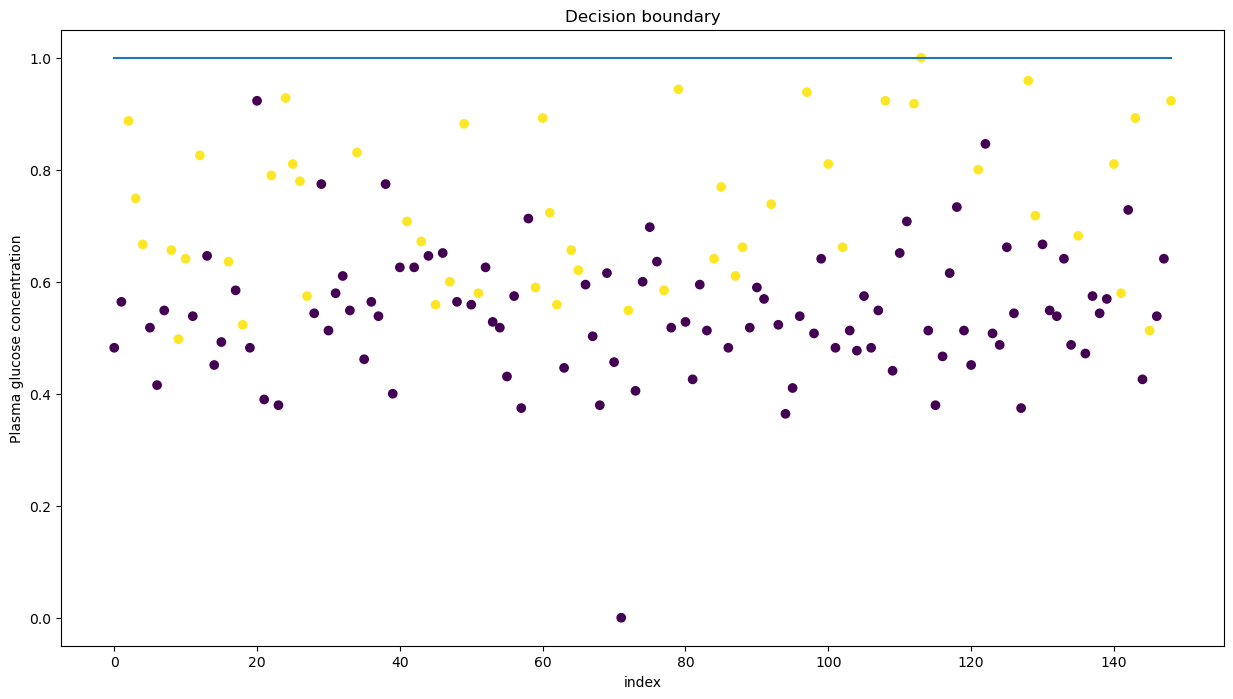

In [58]:
plt.figure(figsize=(15,8))
plt.scatter(X_test.reset_index(drop=True).index,X_test,c=y_test)
plt.plot(X_test.reset_index(drop=True).index,y_hat)
plt.xlabel('index')
plt.ylabel('Plasma glucose concentration')
plt.title('Decision boundary') 

In [52]:
y_hat.loc[y_hat>0.4]=1
y_hat.loc[y_hat<=0.4]=0

In [54]:
f1_score(y_test,y_hat)

0.5025125628140704

In [55]:
precision_score(y_test,y_hat)

0.33557046979865773

In [56]:
confusion_matrix(y_test,y_hat)

array([[ 0, 99],
       [ 0, 50]])

In [57]:
y_hat

609    1.0
539    1.0
694    1.0
350    1.0
174    1.0
      ... 
404    1.0
69     1.0
712    1.0
131    1.0
44     1.0
Name: Plasma glucose concentration, Length: 149, dtype: float64